# **Dementia Prediction Using  Mechine Learing**

![Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrUTQcJpkf0S1SBYAAHEbUYDgr--HnyL9OIADYJn4TwABFfwocgkmXO4L4B6-VIySgWTM&usqp=CAU)

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# DATASET DESCRIPTION


*Subject.ID - Unique Id of the patient

*MRI.ID - Unique Id generated after conducting MRI on patient
Group - It is a group of Converted (Previously Normal but developed dimentia later), Demented and Nondemented (Normal Pateints)
Visit - Number of visit to detect dementia status
MR.Delay - Not Known

Demographics Information

M.F - Gender
Hand - Handedness
Age
EDUC - Years of education
SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)

Clinical Information

MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)

Derived anatomic volumes
eTIV - Estimated total intracranial volume, mm3
nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

**Import dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
data=pd.read_csv("/content/MyDrive/MyDrive/dementia_dataset.csv")
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


Data Features

In [ ]:
data.shape

(373, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


### Data Cleaning

In [ ]:
missing_value= data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
data_types = data.dtypes
missing_values_table = pd.concat([missing_value, percentage, data_types], axis=1)
miss_val = missing_values_table.rename(columns = {0 : 'Missing Values',1 : 'Percentage',2 : 'Data Types'})
miss_val.style.background_gradient(cmap = "plasma")


,Missing Values,Percentage,Data Types
Subject ID,0,0.000000,object
MRI ID,0,0.000000,object
Group,0,0.000000,object
Visit,0,0.000000,int64
MR Delay,0,0.000000,int64
M/F,0,0.000000,object
Hand,0,0.000000,object
Age,0,0.000000,int64
EDUC,0,0.000000,int64
SES,19,5.093834,float64


For the Columns, there is a Null Values For Single feature.

In [ ]:
data['SES'].value_counts()

2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


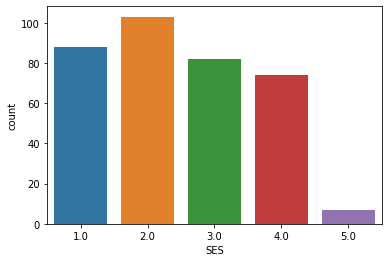

In [ ]:
sns.countplot(data['SES'])

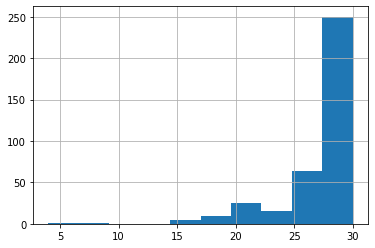

In [ ]:
data['MMSE'].hist()

In [ ]:
data["SES"].fillna(data["SES"].mode(), inplace=True)
data["MMSE"].fillna(data["MMSE"].median(), inplace=True)

In [ ]:
data['SES'].mode()

0    2.0
dtype: float64

In [ ]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

The Null Values into replaced with the mode value or most frequent value of the entire feature column.

**EXPLORATORY DATA ANALYSIS**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,373.0,27.351206,3.675329,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


**Univariant Analysis**

### Unique Values

In [ ]:
for i in data:
  print(f"{i}:{data[i].unique()}")
  print("=========================")

Subject ID:['OAS2_0001' 'OAS2_0002' 'OAS2_0004' 'OAS2_0005' 'OAS2_0007' 'OAS2_0008'
 'OAS2_0009' 'OAS2_0010' 'OAS2_0012' 'OAS2_0013' 'OAS2_0014' 'OAS2_0016'
 'OAS2_0017' 'OAS2_0018' 'OAS2_0020' 'OAS2_0021' 'OAS2_0022' 'OAS2_0023'
 'OAS2_0026' 'OAS2_0027' 'OAS2_0028' 'OAS2_0029' 'OAS2_0030' 'OAS2_0031'
 'OAS2_0032' 'OAS2_0034' 'OAS2_0035' 'OAS2_0036' 'OAS2_0037' 'OAS2_0039'
 'OAS2_0040' 'OAS2_0041' 'OAS2_0042' 'OAS2_0043' 'OAS2_0044' 'OAS2_0045'
 'OAS2_0046' 'OAS2_0047' 'OAS2_0048' 'OAS2_0049' 'OAS2_0050' 'OAS2_0051'
 'OAS2_0052' 'OAS2_0053' 'OAS2_0054' 'OAS2_0055' 'OAS2_0056' 'OAS2_0057'
 'OAS2_0058' 'OAS2_0060' 'OAS2_0061' 'OAS2_0062' 'OAS2_0063' 'OAS2_0064'
 'OAS2_0066' 'OAS2_0067' 'OAS2_0068' 'OAS2_0069' 'OAS2_0070' 'OAS2_0071'
 'OAS2_0073' 'OAS2_0075' 'OAS2_0076' 'OAS2_0077' 'OAS2_0078' 'OAS2_0079'
 'OAS2_0080' 'OAS2_0081' 'OAS2_0085' 'OAS2_0086' 'OAS2_0087' 'OAS2_0088'
 'OAS2_0089' 'OAS2_0090' 'OAS2_0091' 'OAS2_0092' 'OAS2_0094' 'OAS2_0095'
 'OAS2_0096' 'OAS2_0097' 'OAS2_0098' 'OA

### UniVariant Analysis


In [ ]:
df =data.copy()

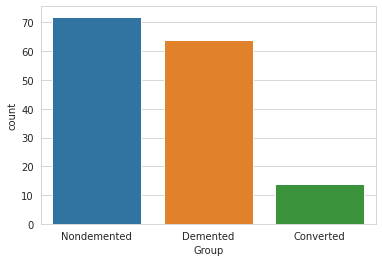

In [ ]:
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


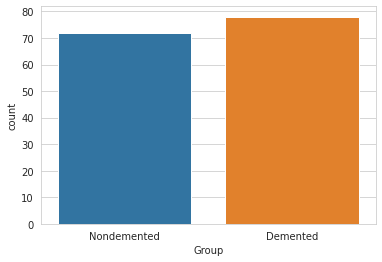

In [ ]:
ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

### Bivariate Analysis 

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

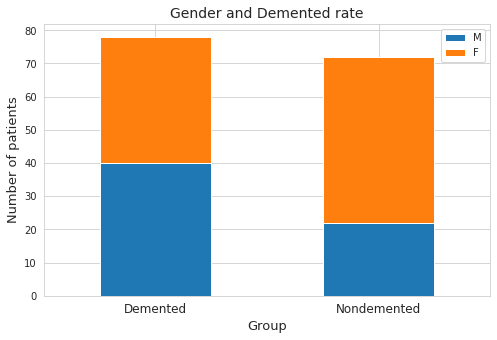

In [ ]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

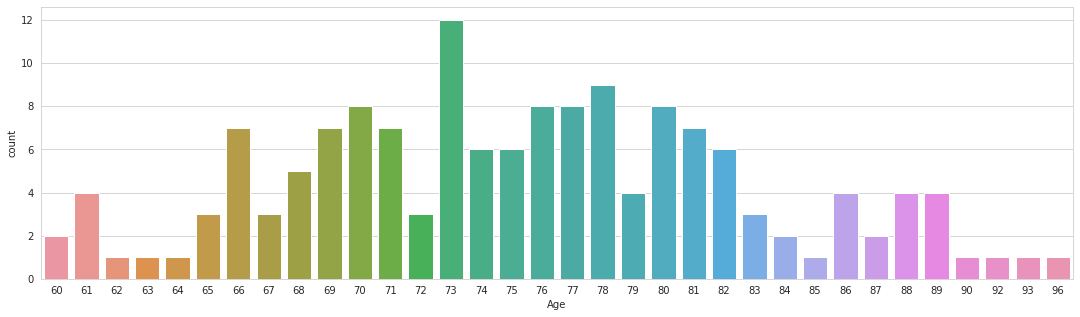

In [ ]:
ax = sns.countplot(x='Age', data=ex_df)
ax.figure.set_size_inches(18.5, 5)

(50.0, 100.0)

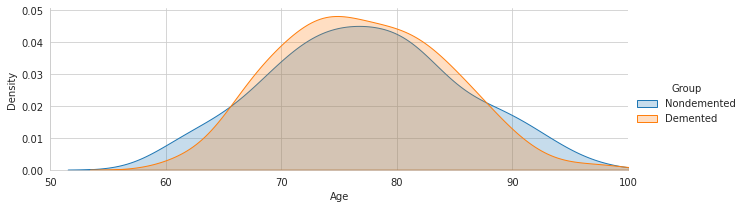

In [ ]:
#AGE vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(15.3, 30.0)

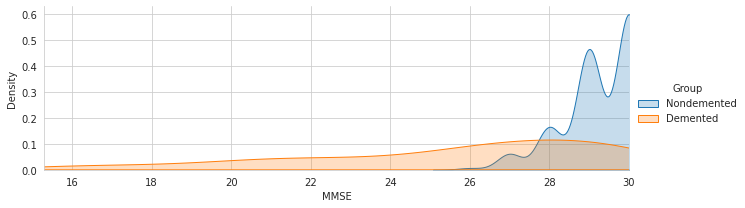

In [ ]:
#MMSE Vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

### Outliers *

In [ ]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([], dtype=int64),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


### Pairplot

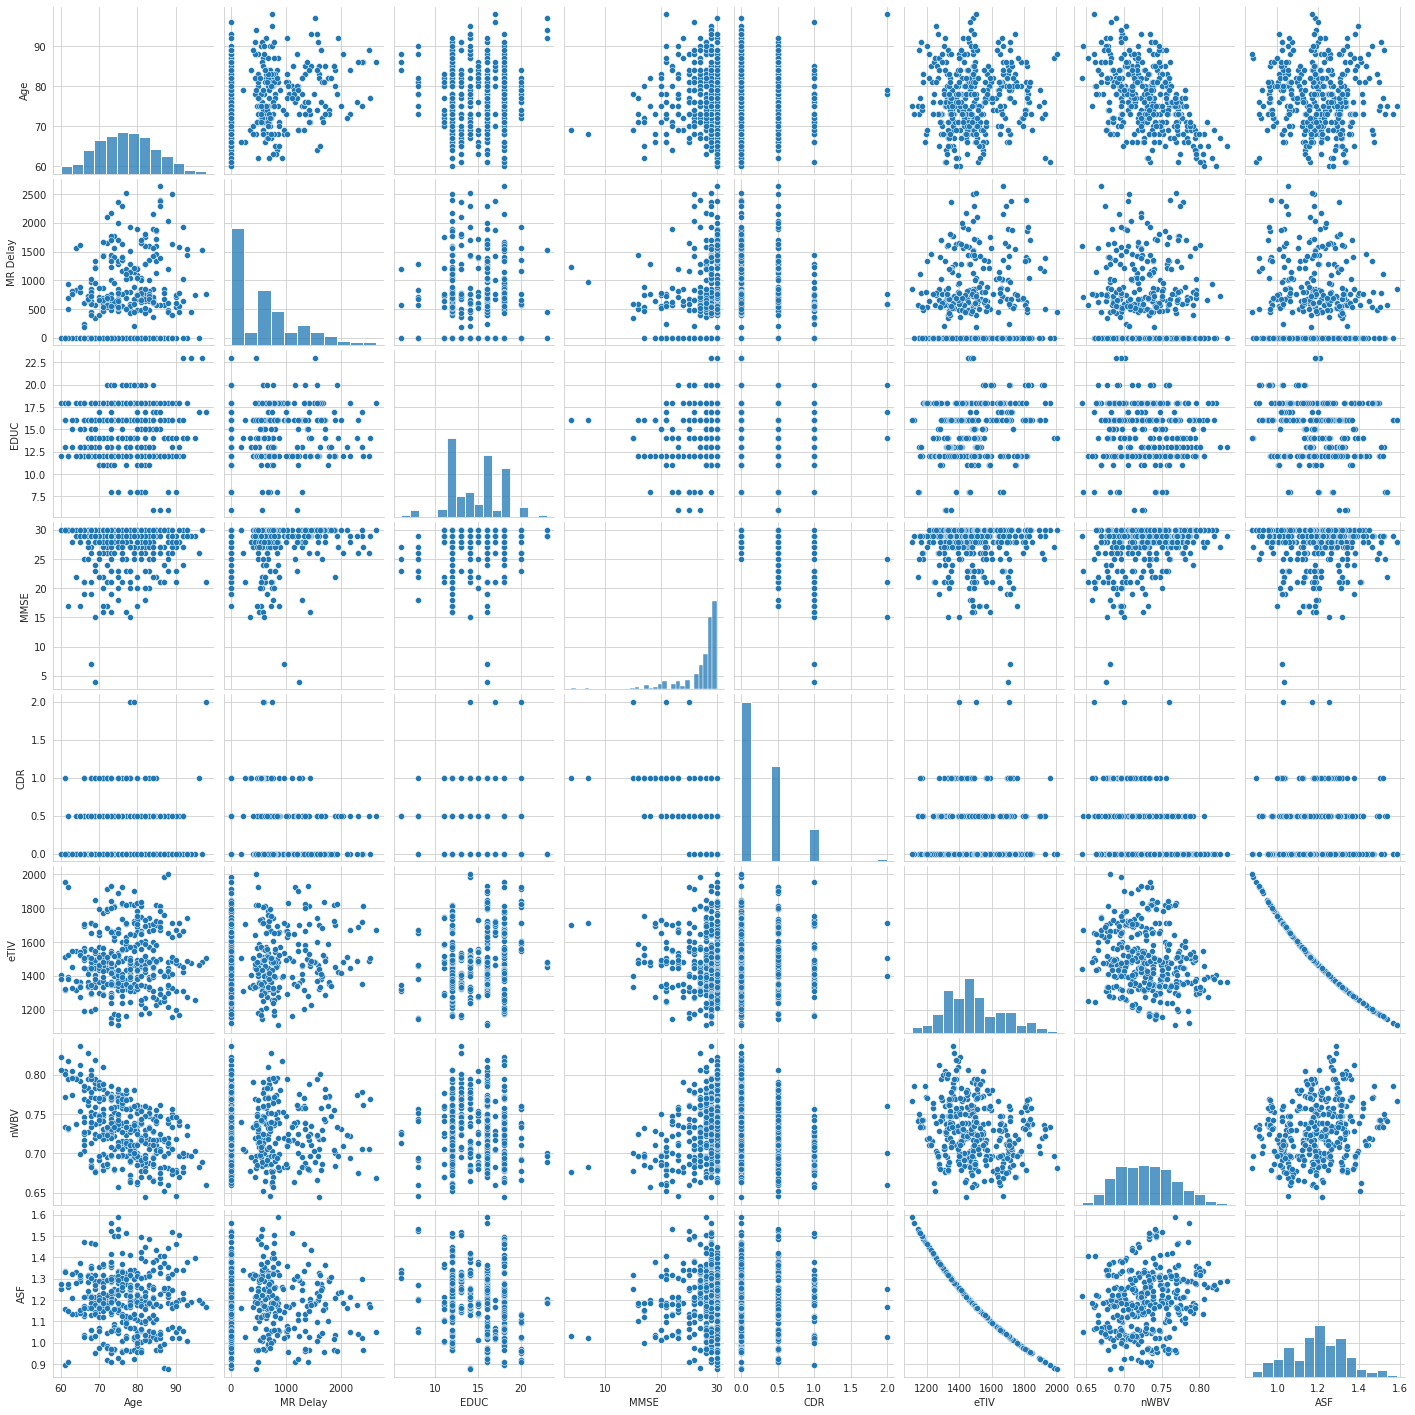

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = (6,4)
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

### Outliers Clear

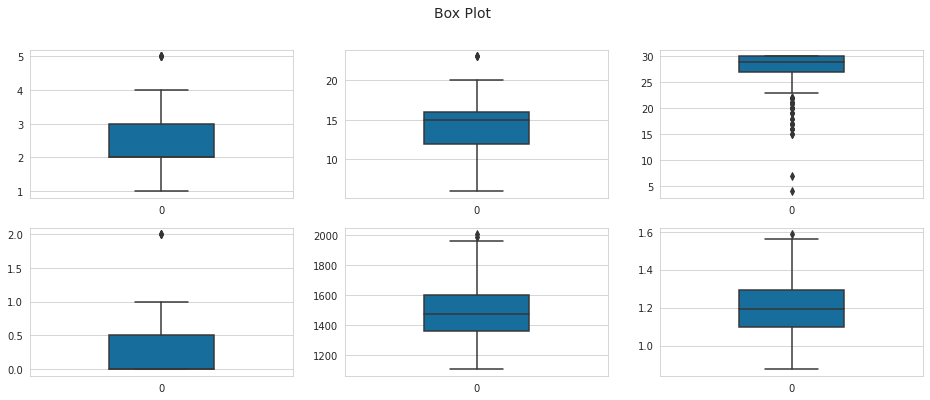

In [ ]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");

convet the charecter data into numeric

In [ ]:

group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

### Correlation

In [ ]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

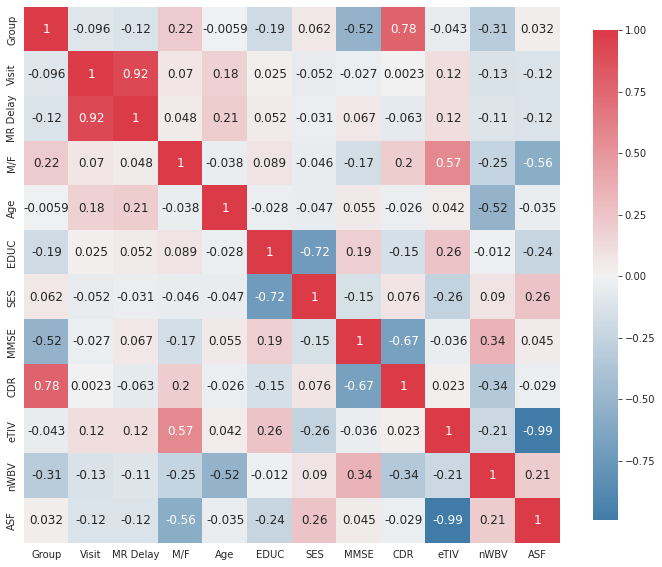

In [ ]:
plot_correlation_map(df)

##Label Encoder

In [ ]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Mechine Learning Model**

### Model

In [ ]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [ ]:
def plot_roc(model):

    y_pred_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')


    plt.title('ROC curve for dementia detection', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    # plot the grid
    plt.grid(True)

**LogisticRegression**

import various functions from statsmodels

In [ ]:
import statsmodels
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.416715
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  261
Model:                          Logit   Df Residuals:                      252
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.3988
Time:                        10:31:01   Log-Likelihood:                -108.76
converged:                       True   LL-Null:                       -180.89
Covariance Type:            nonrobust   LLR p-value:                 3.076e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7018     25.952      2.262      0.024       7.838     109.566
x1             0.8889      0.461      1.926      0.054      -0.015       1.793
x2            -0.0633      0.030     -2.092      0.036      -0.123      -0.004
x3            -0.1597      0.094     -1.694      0.090      -0.345       0.025
x4            -0.0694      0.174     -0.400      0.689      -0.410       0.271
x5            -0.8426      0.142     -5.926      0.000      -1.121      -0.564
x6            -0.1511      0.089     -1.697      0.090      -0.326       0.023
x7            -0.0233      0.007     -3.112      0.002      -0.038      -0.009
x8            -0.1587      0.098     -1.618      0.106      -0.351       0.034
==============================================================================
"""

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [ ]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

**Classification Report**

In [ ]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        61
           1       0.77      0.67      0.72        51

    accuracy                           0.76       112
   macro avg       0.76      0.75      0.75       112
weighted avg       0.76      0.76      0.76       112



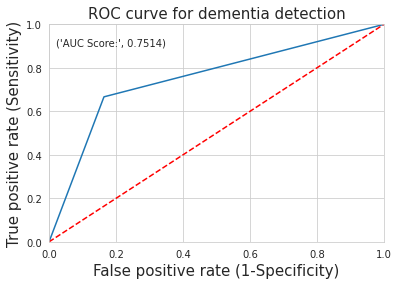

In [ ]:
plot_roc(logreg)

**RandomForestClassifier**

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[57  4]
 [ 9 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.90        61
           1       0.91      0.82      0.87        51

    accuracy                           0.88       112
   macro avg       0.89      0.88      0.88       112
weighted avg       0.89      0.88      0.88       112



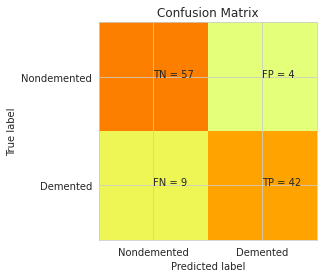

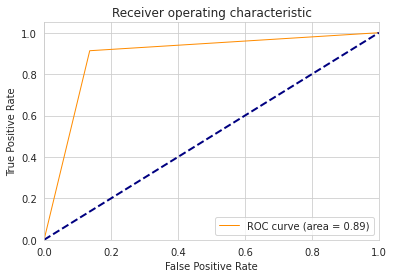


Acuuracy Of the Model:  0.8839285714285714 




In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)

**Support Vector Machine**



Confusion Matrix:
[[53  8]
 [19 32]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        61
           1       0.80      0.63      0.70        51

    accuracy                           0.76       112
   macro avg       0.77      0.75      0.75       112
weighted avg       0.77      0.76      0.75       112



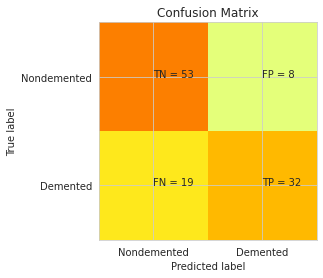

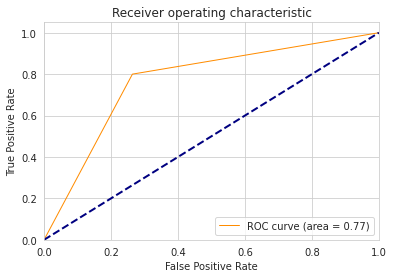


Acuuracy Of the Model:  0.7589285714285714 




In [ ]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)

**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image

In [ ]:
X1=df.drop(["Group"],axis=1)
y1=df["Group"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=10)

In [ ]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini',splitter='best',max_depth=3, random_state = 10)
dtree = decision_tree_classification.fit(X_train, y_train)

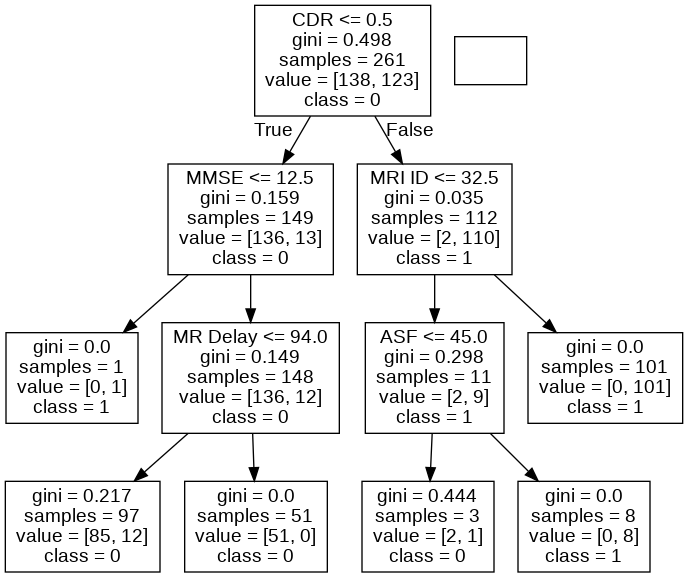

In [ ]:
labels = X_train.columns

dot_data = tree.export_graphviz(dtree, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [ ]:
y_pred=dtree.predict(X_test)


In [ ]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [ ]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.92      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [ ]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap ="winter", cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})


    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

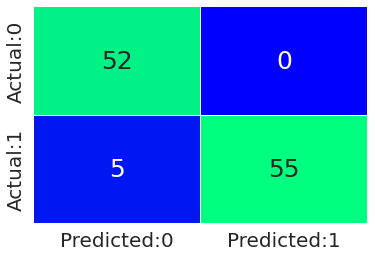

In [ ]:
plot_confusion_matrix(dtree)

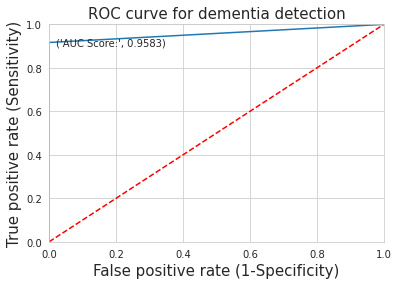

In [ ]:
plot_roc(dtree)

To categorise the model to accurately predict the solution, fine-tune the model to provide greater model accuracy into relationships for people with and without dementia.

**Thank You**